We learned that the mean takes into account each value in the distribution, and we saw that it's fairly easy to define the mean algebraically. These two properties make the mean far superior to the median. The median comes in handy, however, when it's not possible or appropriate to compute the mean.

We'll explore a couple of cases where neither the mean nor the median are suitable for finding an average value, and we'll learn an alternative summary metric.

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

houses = pd.read_table('AmesHousing_1.txt')

In [2]:
print(houses['Land Slope'].unique())

['Gtl' 'Mod' 'Sev']


We found that the Land Slope variable is ordinal. 'Gtl' means gentle slope, 'Mod' means moderate slope, and 'Sev' stands for 'Severe slope'.

We can't compute the mean for this variable because its values are words, not numbers.

We learned previously that the median is a good workaround for ordinal data, but the values of this ordinal variable are not numbers. Can we still compute the median?

If we sort the values of the Land Slope variable, we can find that the middle two values are ['Gtl', 'Gtl'] (the variable has an even number of values). Although we can't take their mean, it's intuitively clear that the average of two identical values is one of those values, so the median value should be 'Gtl'.

However, if the two middle values were ['Gtl', 'Mod'], then it wouldn't be clear at all what to choose for the median. In cases like this, one workaround for finding an average value is to measure the most frequent value in the distribution. For the Land Slope variable, we can see that the value 'Gtl' has the greatest frequency:

In [3]:
print(houses['Land Slope'].value_counts())

Gtl    2789
Mod     125
Sev      16
Name: Land Slope, dtype: int64


We call the most frequent value in the distribution the mode. So the mode of the Land Slope variable is 'Gtl'. In other words, the typical house has a gentle slope. Very importantly, notice that the mode is the most frequent value in the distribution, not the frequency of that value — so the mode is 'Gtl', not 2789.

Just like for the median, there's no standard notation for the mode. It's also worth noting that the mode is not defined algebraically.

In [11]:
# function that takes in an array of values (including strings) and returns the mode of that array.

def mode(col):
    freq = {}
    
    for i in col:
        if i in freq:
            freq[i] += 1
        else:
            freq[i] = 1
    
    max_key = max(freq, key = freq.get)
    return max_key
            

In [17]:
mode_function = mode(houses['Land Slope'])
mode_function

'Gtl'

In [22]:
mode_numpy = houses['Land Slope'].mode()[0]
mode_numpy

'Gtl'

In [23]:
mode_function == mode_numpy

True

The mode is ideal for ordinal data represented using words. The mode is also a good choice for nominal data.

In [24]:
print(houses['Roof Style'].value_counts())

Gable      2321
Hip         551
Gambrel      22
Flat         20
Mansard      11
Shed          5
Name: Roof Style, dtype: int64


We obviously can't compute the mean for this variable because the values are words. Even if they were coded as numbers, it'd be completely wrong to compute the mean because in the case of nominal variables the numbers describe qualities, not quantities.

we made the case that we could compute the mean for ordinal variables if the values are numbers. This reasoning doesn't extend to nominal variables because they don't describe quantities, like ordinal variables do.

Because the Roof Style variable is nominal, there's also no inherent order of the values in the distribution. This means that we can't sort the values in an ascending or descending order. The first step in computing the median is to sort the values in ascending order, which means we can't compute the median for the Roof Style variable.

There are some cases where computing the mean and the median is possible and correct, but the mode is preferred nonetheless. This is sometimes the case for discrete variables (variables measured on interval or ratio scales can also be classified as discrete or continuous). A variable is discrete if there's no possible intermediate value between any two adjacent values.

In [25]:
print(houses['Kitchen AbvGr'].value_counts().sort_index()) # is an example of discrete variable

0       3
1    2796
2     129
3       2
Name: Kitchen AbvGr, dtype: int64


If we take the mean, we'd need to write that the typical house has 1.04 kitchens. This wouldn't make much sense for the regular reader, who expects the number of kitchens to be a whole number, not a decimal.

The median is 1 — a value much easier to grasp by non-technical people compared to 1.04. But this is a lucky case because the middle two values in the sorted distribution could have been [1,2], and then the median would have been 1.5. The mode is a safer choice for cases like this because it guarantees a whole number from the distribution.

The mode of the Kitchen AbvGr variable is 1. When we report this result, we should avoid technical jargon (like "mode" or "variable") and simply say that the typical house on the market has one kitchen.

Note that the mode is also guaranteed to be a value from the distribution (this holds true for any kind of variable). This doesn't apply to the mean or the median, which can return values that are not present in the actual distribution. For instance, the mean of the Kitchen AbvGr is 1.04, but the value 1.04 is not present in the distribution.

The mean and the median generally summarize the distribution of a discrete variable much better than the mode, and we should use the mode only if we need to communicate our results to a non-technical audience.

There are distributions that can have more than one mode. For this reason, we call this distribution bimodal (the prefix "bi-" means "twice"). If the distribution had only one mode, we'd call it unimodal (the prefix "uni-" means "only one").  When a distribution has more than two modes, we say that the distribution is multimodal (the prefix "multi-" means many).

We can also have cases when there is no mode at all.Distributions without a mode are often specific to continuous variables. It's quite rare to find two identical values in a continuous distribution

The workaround is to organize the continuous variable in a grouped frequency table, and select for the mode the midpoint of the class interval (the bin) with the highest frequency. This method has its limitations, but it generally gives reasonable answers. 

In [26]:
# grouped frequency table for the SalePrice variable

houses["SalePrice"].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [49]:
intervals = pd.interval_range(start = 0, end = 800000, freq=100000)
gr_freq_table = pd.Series(0,index = intervals)


In [51]:
for i in houses["SalePrice"]:
    for interval in intervals:
        if i in interval:
            gr_freq_table.loc[interval] += 1
            break
gr_freq_table

(0, 100000]          504
(100000, 200000]    3642
(200000, 300000]    1254
(300000, 400000]     332
(400000, 500000]      94
(500000, 600000]      22
(600000, 700000]       8
(700000, 800000]       4
dtype: int64

In [53]:
# class interval with the highest frequency

mode = (100000+200000)/2 # mode is a midpoint of the class interval (the bin) with the highest frequency.
mode

150000.0

In [54]:
mean = houses["SalePrice"].mean()
median = houses["SalePrice"].median()
print(mean, median)

180796.0600682594 160000.0


The mode is lower than the median, and the median is lower than the mean. or The mean is greater than the median, and the median is greater than the mode

When we plot a histogram or a kernel density plot to visualize the shape of a distribution, the mode will always be the peak of the distribution

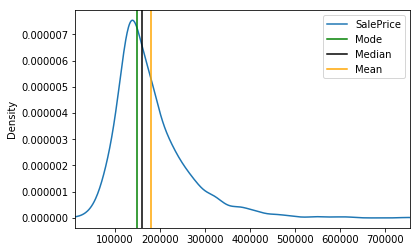

In [78]:
fig, ax = plt.subplots()
houses['SalePrice'].plot.kde(xlim = (houses['SalePrice'].min(),
                                  houses['SalePrice'].max())
                         )

ax.axvline(150000, color = "Green", label = "Mode")
ax.axvline(houses['SalePrice'].median(), color = 'Black', label = 'Median')
ax.axvline(houses['SalePrice'].mean(), color = 'Orange', label = 'Mean')
plt.legend()

This distribution is clearly right skewed. Generally, the location of the mode, median and mean is predictable for a right-skewed distribution:

* Most values are concentrated in the left body of the distribution where they will form a peak — this is where the mode will be.
* Remember that the median divides a distribution in two halves of equal length. For this reason, the median is usually positioned slightly right from the peak (the mode) for a right-skewed distribution.
* The mean takes into account each value in the distribution, and it will be affected by the outliers in the right tail. This will generally pull the mean to the right of the median.

For a left-skewed distribution, the direction is simply reversed: the mean is positioned to the left of the median, and the median to the left of the mode

These patterns generally hold true for most skewed distributions, but Paul von Hippel showed in [a relatively recent paper](https://www.tandfonline.com/doi/full/10.1080/10691898.2005.11910556) that this rule of thumb has a few exceptions.

In [79]:
distribution_1 = {'mean': 3021 , 'median': 3001, 'mode': 2947}
distribution_2 = {'median': 924 , 'mode': 832, 'mean': 962}
distribution_3 = {'mode': 202, 'mean': 143, 'median': 199}

shape_1 = 'right skew'
shape_2 = 'right skew'
shape_3 = 'left skew'

The location of the mean, median, and mode are also predictable for symmetrical distributions(the shape of a distribution is symmetrical, then we can divide the distribution in two halves that are mirror images of one another). The median divides the distribution in two equal halves. As a consequence, the median will always be at the center of a perfectly symmetrical distribution because only a line drawn at the center can divide the distribution in two equal halves.

For a perfectly symmetrical distribution, the two equal halves will bear the same weight when computing the mean because the mean takes into account equally each value in the distribution. The mean is not pulled neither to the left, nor to the right, and stays instead in the center, at the same location as the median. The mean and the median are always equal for any perfectly symmetrical distribution.

Although the mean and the median have a constant location for every symmetrical distribution (no matter the shape), the location of the mode can change. The mode is where the peak is, so for a normal distribution the mode will be at the center, right where the mean and the median are.

It's possible to have a symmetrical distribution with more than one peak, which means that the mode won't be at the center

A uniform distribution doesn't have any peaks, which means it doesn't have any mode:

In practice, we almost never work with perfectly symmetrical distributions, but many distributions are approximately symmetrical nonetheless. This means that the patterns outlined above are still relevant for practical purposes.

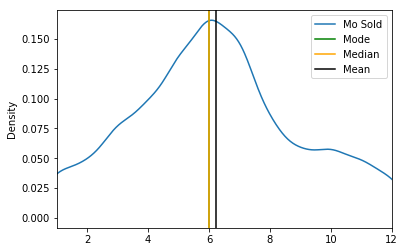

In [85]:
fig,ax = plt.subplots()
houses["Mo Sold"].plot.kde(xlim = (1,12))
ax.axvline(houses["Mo Sold"].mode()[0], color = "Green", label = "Mode")
ax.axvline(houses["Mo Sold"].median(), color = 'Orange', label = 'Median')
ax.axvline(houses["Mo Sold"].mean(), color = 'Black', label = 'Mean')
plt.legend()

we learned that the mode is ideal for summarizing:

* Ordinal data represented using words.
* Nominal data.
* Discrete data (when the average value needs to be communicated to a non-technical audience).

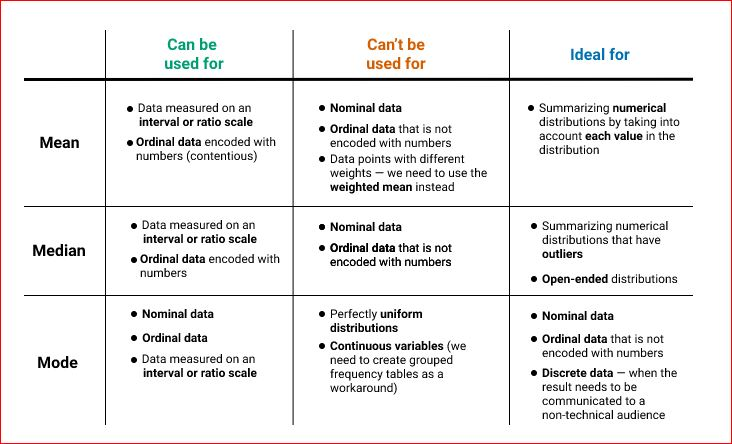

In [87]:
from IPython.display import Image
Image("Averages.jpg")